In [1]:
from random import sample, randint
import json

In [2]:
def create(valid_coordinates):
    
    for i in range(1, 501):
        colors = ["red", "blue", "green"]
        coordinates = valid_coordinates
        
        outname = "test" + str(i) + ".json"
        
        no_pieces = randint(1,4)
        piece_loc = sample(coordinates, no_pieces)
        
        no_blocks = randint(0, 6)
        potential_loc = [i for i in coordinates if i not in piece_loc]
        block_loc = sample(potential_loc, no_blocks)
        
        data = {"colour": ''.join(sample(colors,1)),
               "pieces": piece_loc,
               "blocks": block_loc}

        with open(outname, 'w') as outfile:
            json.dump(data, outfile)

In [7]:
valid_coordinates = ((-3, 0), (-3, 1), (-3, 2), (-3, 3),
                    (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-2, 3),
                    (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3),
                    (0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3),
                    (1, -3), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2),
                    (2, -3), (2, -2), (2, -1), (2, 0), (2, 1),
                    (3, -3), (3, -2), (3, -1), (3, 0))

# BENCHMARK 

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
import subprocess
import matplotlib.pyplot as plt
from collections import defaultdict
nodes_generated = defaultdict(int)
time_taken = defaultdict(float)

In [10]:
create(valid_coordinates)

In [12]:
for i in range(1, 501):
    file = 'test'+str(i)+'.json'
    proc = subprocess.Popen(['python', 'search.py',  file], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    output = proc.communicate()[0].split()

    time_taken[file] = float(output[0])
    nodes_generated[file] = int(output[1])

print(nodes_generated)
print(time_taken)

plt.figure(figsize=(20,10))

plt.bar(nodes_generated.keys(),nodes_generated.values())
plt.yscale('log')
plt.xticks(rotation='90')


plt.show()

plt.figure(figsize=(20,10))
plt.bar(time_taken.keys(),time_taken.values())
plt.xticks(rotation='90')


plt.show()

ValueError: could not convert string to float: b'#'

In [13]:
print(f"Number of time greater than 30 seconds: {sum([1 for i in time_taken.values() if i >= 30])}")

Number of time greater than 30 seconds: 0


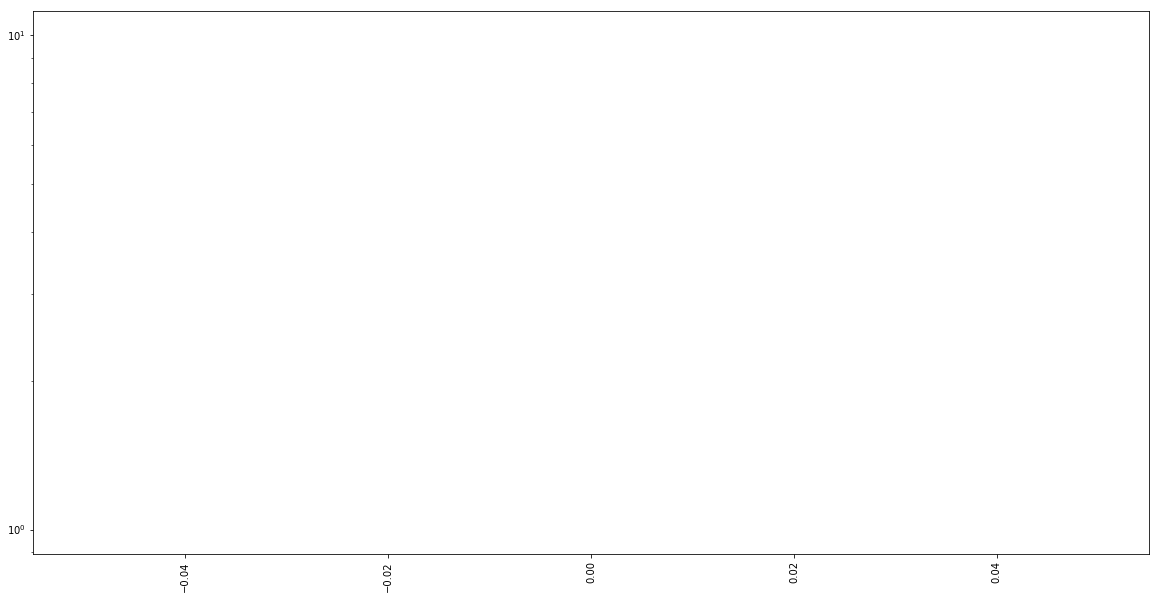

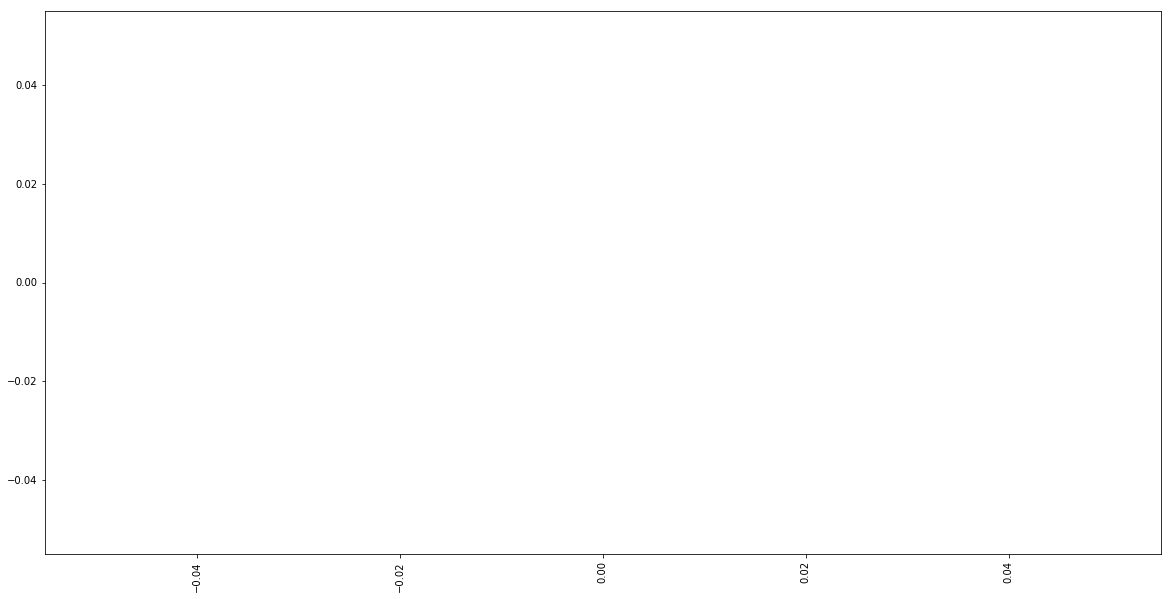

In [14]:
plt.figure(figsize=(20,10))

plt.bar(nodes_generated.keys(),nodes_generated.values())
plt.yscale('log')
plt.xticks(rotation='90')


plt.show()

plt.figure(figsize=(20,10))
plt.bar(time_taken.keys(),time_taken.values())
plt.xticks(rotation='90')


plt.show()